In [1]:
import quickdraw

2022-06-14 10:55:06.355399: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 10:55:06.355421: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
?quickdraw.load_data

In [3]:
(x_train, y_train), (x_test, y_test) = quickdraw.load_data()

In [4]:
x_train.shape, x_train.dtype

((60000, 28, 28), dtype('uint8'))

In [5]:
y_train.shape, y_train.dtype

((60000,), dtype('uint8'))

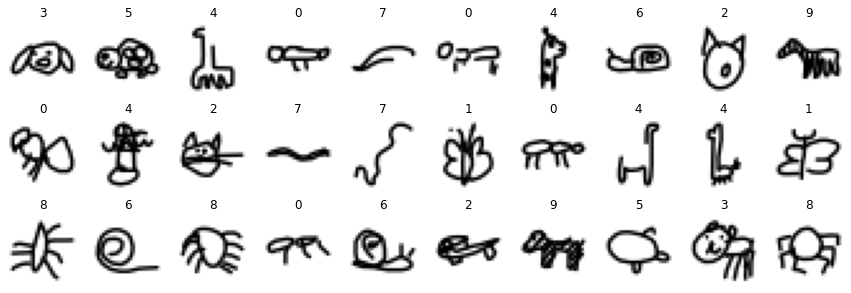

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for img in range(30):
    plt.subplot(3, 10, img+1)
    plt.imshow(x_train[img], cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(y_train[img])
plt.show()

In [7]:
x_train = x_train/ 255.0
x_test = x_test/ 255.0

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_test.shape, y_test.dtype

((10000,), dtype('uint8'))

In [10]:
y_test[:10]

array([8, 1, 9, 2, 6, 2, 2, 9, 4, 2], dtype=uint8)

In [11]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
y_test[:10]

In [ ]:
# Deep learning 

# create model
neural = keras.models.Sequential()

neural.add(keras.layers.InputLayer(input_shape=(28*28,), name='Input'))  # use 10, to add as tuple, we have 10 samples
neural.add(keras.layers.Dense(units=256, activation='relu', name='Hidden_1'))
neural.add(keras.layers.Dense(units=64, activation='relu', name='Hidden_2'))
neural.add(keras.layers.Dense(units=16, activation='relu', name='Hidden_3'))
neural.add(keras.layers.Dense(units=10, activation='softmax', name='Output'))

neural.summary()

In [ ]:
# # # Deep learning 

# # # create model
# neural = keras.models.Sequential()

# neural.add(keras.layers.InputLayer(input_shape=(28,28), name='Input'))
# neural.add(keras.layers.Flatten())
# neural.add(keras.layers.Dense(units=512, activation='tanh', name='Hidden_1'))
# neural.add(keras.layers.Dropout(0.3))
# neural.add(keras.layers.Dense(units=128, activation='tanh', name='Hidden_2'))
# neural.add(keras.layers.Dropout(0.2))
# neural.add(keras.layers.Dense(units=32, activation='tanh', name='Hidden_3'))
# neural.add(keras.layers.Dense(units=10, activation='softmax', name='Output'))

# neural.summary()

In [16]:
# # Deep learning 

# # create model
# neural = keras.models.Sequential()

# neural.add(keras.layers.InputLayer(input_shape=(28,28), name='Input'))
# neural.add(keras.layers.Flatten())
# neural.add(keras.layers.Dense(units=512, activation='tanh', name='Hidden_1', 
#                               kernel_regularizer=keras.regularizers.l1(1e-4)))
# neural.add(keras.layers.Dense(units=128, activation='tanh', name='Hidden_2',
#                              kernel_regularizer=keras.regularizers.l1(1e-4)))
# neural.add(keras.layers.Dense(units=32, activation='tanh', name='Hidden_3'))
# neural.add(keras.layers.Dense(units=10, activation='softmax', name='Output'))

# neural.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 28, 256)           7424      
                                                                 
 Hidden_2 (Dense)            (None, 28, 64)            16448     
                                                                 
 Hidden_3 (Dense)            (None, 28, 16)            1040      
                                                                 
 Output (Dense)              (None, 28, 10)            170       
                                                                 
Total params: 25,082
Trainable params: 25,082
Non-trainable params: 0
_________________________________________________________________


In [17]:
neural.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=keras.metrics.CategoricalAccuracy()
)
history = neural.fit(
    x=x_train,
    y=y_train,
    epochs=6,
    batch_size=100,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/6


ValueError: in user code:

    File "/homes/maschepers/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/homes/maschepers/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/homes/maschepers/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/homes/maschepers/.local/lib/python3.8/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/homes/maschepers/.local/lib/python3.8/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/homes/maschepers/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/homes/maschepers/.local/lib/python3.8/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/homes/maschepers/.local/lib/python3.8/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/homes/maschepers/.local/lib/python3.8/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/homes/maschepers/.local/lib/python3.8/site-packages/keras/backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (100, 10) and (100, 28, 10) are incompatible


In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['loss'], 'go', label='Training loss')
plt.plot(history.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['categorical_accuracy'], 'go', label='Categorical accuracy')
plt.plot(history.history['val_categorical_accuracy'], 'g-', label='Validation categorical accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np

yhat_test = neural.predict(x_test)
label_test = np.argmax(yhat_test, axis=1)
label_test

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for img in range(30):
    plt.subplot(3, 10, img+1)
    plt.imshow(x_test[img].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(str(label_test[img]))
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

conmat = confusion_matrix(np.argmax(y_test, axis=1), label_test)
conmat

In [ ]:
plt.subplots(figsize=(10, 10))
plt.imshow(conmat, cmap=plt.cm.YlGnBu, vmin=0.0)
plt.xlabel('$\hat{y}$')
plt.ylabel('y')
plt.colorbar()
plt.title('confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
print(f'Acc: {accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')
print(f'bAcc: {balanced_accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), label_test, digits=4))